In [97]:
import pandas as pd
import yfinance as yf
import pandas as pd
from datetime import datetime
#https://www.geeksforgeeks.org/python-pandas-dataframe-resample/

In [98]:
from_date='2016-12'
to_date='2019-12'
timeframe="M"

data_file='SET_CLose_Day.csv'

#months_param=[1,2,3,4]
months_param=[]

In [99]:
df=pd.read_csv(data_file,parse_dates=['Date/Time'],dayfirst=True,usecols=['Date/Time','close'])
df.rename(columns={'Date/Time':'date'},inplace=True)
df.set_index('date',inplace=True)
df=df.loc[from_date:to_date,:]
df = df.resample(timeframe).last()
df['roc']=df['close'].pct_change()*100
df['roc']=df['roc'].round(2)
df=df.dropna()


df['year'] = df.index.year
df['month'] = df.index.month
df['month_name'] = df.index.month_name()


if  len(months_param)>0:
 df=df.query('month in @months_param')

df.tail()

,close,roc,year,month,month_name
date,,,,,
2019-08-31,1654.92,-3.33,2019,8,August
2019-09-30,1637.22,-1.07,2019,9,September
2019-10-31,1601.49,-2.18,2019,10,October
2019-11-30,1590.59,-0.68,2019,11,November
2019-12-31,1579.84,-0.68,2019,12,December


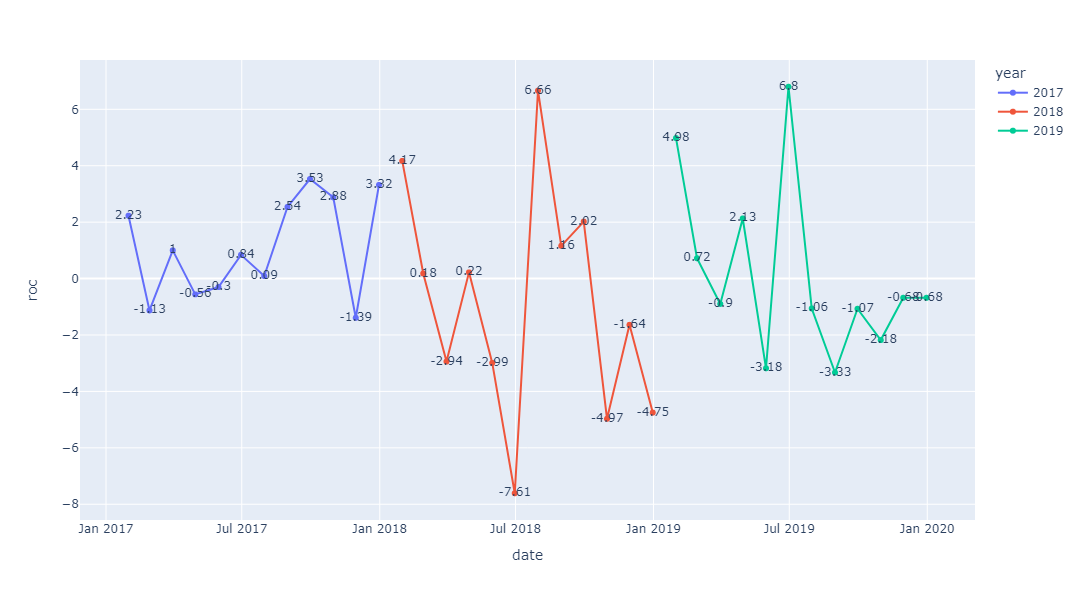

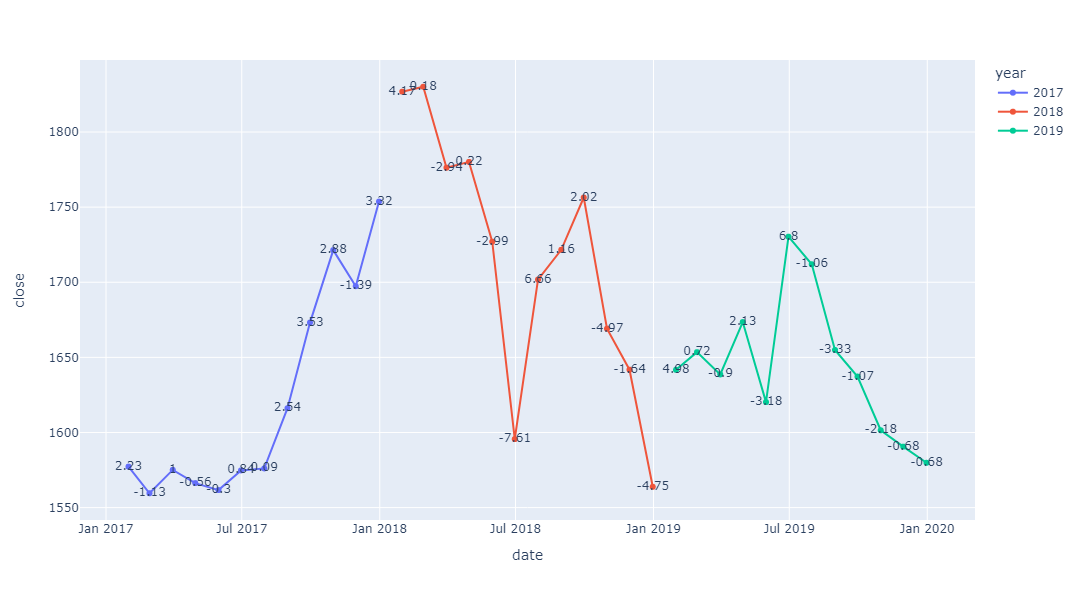

In [100]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = px.line(df, x=df.index, y='roc', color='year',text='roc', width=1200, height=600)
fig.show()

fig = px.line(df, x=df.index, y='close', color='year',text='roc', width=1200, height=600)
fig.show()


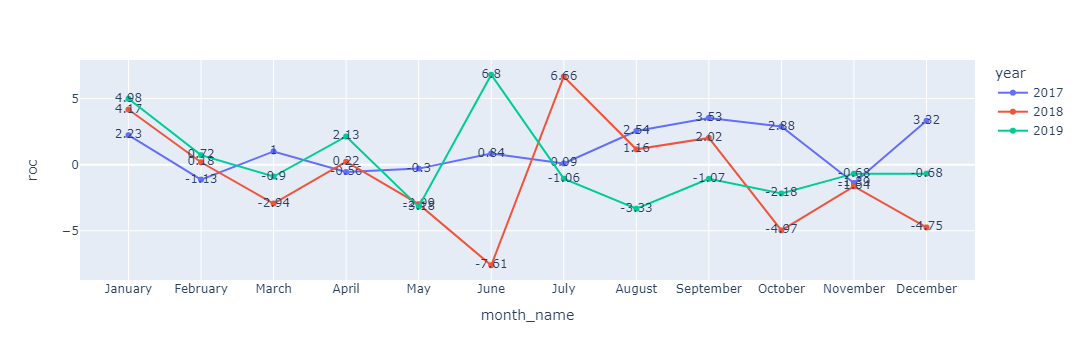

In [101]:
fig = px.line(df, x='month_name', y='roc', color='year',text='roc', )
fig.show()